# **Spotify Recommendation Algorithms**

Step 1 : We'll use content-based filtering using audio features (like tempo, energy, danceability, etc.) to recommend similar songs.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Recommendation System/Perfect Data using/SingerAndSongs.csv')

# Preview the dataset
df.head()

,Singer,acousticness,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,Song name,speechiness,tempo,track_href,valence
0,Aastha Gill,0.48500,0.770,0.824,39ujbBjTwwqUFySaCYDMMT,0.000000,1,0.3180,-6.491,0,Proper Patola,0.0851,172.006,https://api.spotify.com/v1/tracks/39ujbBjTwwqU...,0.490
1,Aastha Gill,0.14300,0.825,0.666,5cjVsWqIkBQC7acTRhL0RO,0.000003,4,0.2370,-4.847,0,Kamariya,0.0554,96.987,https://api.spotify.com/v1/tracks/5cjVsWqIkBQC...,0.763
2,Aastha Gill,0.23600,0.663,0.551,3XYvdqcZrTmRntFDDbJkJd,0.000036,3,0.0923,-8.272,0,Buzz (feat. Badshah),0.1090,113.314,https://api.spotify.com/v1/tracks/3XYvdqcZrTmR...,0.601
3,Aastha Gill,0.00323,0.919,0.571,46GBoFCdFZZSjuGaZjZmGv,0.001680,5,0.1030,-7.175,0,Saara India,0.0687,105.007,https://api.spotify.com/v1/tracks/46GBoFCdFZZS...,0.231
4,Aastha Gill,0.12900,0.867,0.720,6VwVEIiCro1EMyh9B6Om3v,0.000000,9,0.2280,-5.188,0,Drunk n High,0.0619,104.974,https://api.spotify.com/v1/tracks/6VwVEIiCro1E...,0.755


📊 Step 2: Explore the Dataset Structure
- Run this code to understand what columns you have:

In [ ]:
print(df.columns)
print(df.info())
print(df.describe())

Index(['Singer', 'acousticness', 'danceability', 'energy', 'id',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'Song name',
       'speechiness', 'tempo', 'track_href', 'valence'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2231 entries, 0 to 2230
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Singer            2231 non-null   object 
 1   acousticness      2231 non-null   float64
 2   danceability      2231 non-null   float64
 3   energy            2231 non-null   float64
 4   id                2231 non-null   object 
 5   instrumentalness  2231 non-null   float64
 6   key               2231 non-null   int64  
 7   liveness          2231 non-null   float64
 8   loudness          2231 non-null   float64
 9   mode              2231 non-null   int64  
 10  Song name         2230 non-null   object 
 11  speechiness       2231 non-null   float64
 12  tempo  

🧹 Step 3: Clean & Normalize the Data

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load your dataset (example)
# Replace 'your_dataset.csv' with your actual CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Recommendation System/Perfect Data using/SingerAndSongs.csv')

# Display column names to debug
print("Available columns:", df.columns.tolist())

# Normalize column names (optional but helpful)
df.columns = df.columns.str.strip().str.lower()

# Check if required columns exist
if 'track_name' in df.columns and 'artist_name' in df.columns:
    df.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)
else:
    print("Required columns 'track_name' and 'artist_name' not found.")
    # Optionally print a few column names for manual inspection
    print("First few column names:", df.columns[:5])
    # You may exit or skip deduplication step here

# Drop rows with any null values
df.dropna(inplace=True)

# Define the audio feature columns
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

# Check that all features are present
missing = [col for col in features if col not in df.columns]
if missing:
    raise ValueError(f"Missing feature columns: {missing}")

# Scale the feature values
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Display a preview of the scaled data
print(df_scaled[features].head())

Available columns: ['Singer', 'acousticness', 'danceability', 'energy', 'id', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'Song name', 'speechiness', 'tempo', 'track_href', 'valence']
Required columns 'track_name' and 'artist_name' not found.
First few column names: Index(['singer', 'acousticness', 'danceability', 'energy', 'id'], dtype='object')
   danceability    energy  loudness  speechiness  acousticness  \
0      0.753374  0.814689  0.676803     0.093674      0.487790   
1      0.820859  0.636158  0.758622     0.048729      0.143634   
2      0.622086  0.506215  0.588165     0.129843      0.237220   
3      0.936196  0.528814  0.642761     0.068856      0.002983   
4      0.872393  0.697175  0.741651     0.058565      0.129546   

   instrumentalness  liveness   valence     tempo  
0          0.000000  0.311434  0.484204  0.734423  
1          0.000003  0.226153  0.777563  0.260172  
2          0.000037  0.073805  0.603482  0.363387  
3          0.001737  0.085071  

🧠 Step 4: Define the Recommendation Function

In [ ]:
def recommend_songs(song_name, artist_name=None, n=5):
    # Filter by song and optionally artist
    if artist_name:
        selected_song = df_scaled[(df_scaled['track_name'].str.lower() == song_name.lower()) &
                                  (df_scaled['artist_name'].str.lower() == artist_name.lower())]
    else:
        selected_song = df_scaled[df_scaled['track_name'].str.lower() == song_name.lower()]

    if selected_song.empty:
        return "Song not found in dataset."

    selected_features = selected_song[features].values
    similarity = cosine_similarity(selected_features, df_scaled[features])[0]

    df_scaled['similarity'] = similarity
    recommendations = df_scaled.sort_values(by='similarity', ascending=False)

    return recommendations[['track_name', 'artist_name', 'similarity']].iloc[1:n+1]

✅ Step 5: Test the Recommender

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Spotify Recommendation System/Perfect Data using/SingerAndSongs.csv')  # Replace with your file name

# Normalize column names
df.columns = df.columns.str.strip().str.lower()

# Rename to expected names
df.rename(columns={'song name': 'track_name', 'singer': 'artist_name'}, inplace=True)

# Drop duplicates and missing values
df.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)
df.dropna(inplace=True)

# Define audio features
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

# Check for missing features
missing = [col for col in features if col not in df.columns]
if missing:
    raise ValueError(f"Missing feature columns: {missing}")

# Scale the features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Recommendation function
def recommend_songs(song_name, artist_name=None, n=5):
    song_name = song_name.lower()
    artist_name = artist_name.lower() if artist_name else None

    if artist_name:
        match = df_scaled[(df_scaled['track_name'].str.lower() == song_name) &
                          (df_scaled['artist_name'].str.lower() == artist_name)]
    else:
        match = df_scaled[df_scaled['track_name'].str.lower() == song_name]

    if match.empty:
        print("Song not found. Please check the title or artist.")
        return

    similarity = cosine_similarity(match[features], df_scaled[features])
    df_scaled['similarity'] = similarity[0]

    recommendations = df_scaled[df_scaled['track_name'].str.lower() != song_name]
    recommendations = recommendations.sort_values(by='similarity', ascending=False).head(n)

    print("\nTop Recommended Songs:")
    for idx, row in recommendations.iterrows():
        print(f"{row['track_name']} by {row['artist_name']} (Score: {row['similarity']:.2f})")

# Example usage
recommend_songs("Tum Hi Ho", artist_name="Arijit Singh", n=5)

Song not found. Please check the title or artist.


In [ ]:
# List of songs to check
songs_to_check = [
    "Paani Paani",
    "Naagin",
    "52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)",
    "Dj Waley Babu (feat. Aastha Gill)",
    "Crazy Lady",
    "Badtameez",
    "Call Waiting - Reprise",
    "Light Kardo Band (feat. Aastha Gill)",
    "Kareja Kareja (feat. Aastha Gill)"
]

# Convert to lowercase for case-insensitive match
df['track_name_lower'] = df['track_name'].str.lower()

# Print song presence status
for song in songs_to_check:
    if song.lower() in df['track_name_lower'].values:
        print(f"✅ Found: {song}")
    else:
        print(f"❌ Not Found: {song}")

✅ Found: Paani Paani
✅ Found: Naagin
✅ Found: 52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)
✅ Found: Dj Waley Babu (feat. Aastha Gill)
✅ Found: Crazy Lady
✅ Found: Badtameez
✅ Found: Call Waiting - Reprise
✅ Found: Light Kardo Band (feat. Aastha Gill)
✅ Found: Kareja Kareja (feat. Aastha Gill)




📈 Optional Step 6: Visualize Recommendations


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spotify Recommendation System/Perfect Data using/SingerAndSongs.csv")  # Replace with your actual CSV file
df.columns = df.columns.str.strip().str.lower()

# Rename for consistency
df.rename(columns={'song name': 'track_name', 'singer': 'artist_name'}, inplace=True)

# Drop duplicates and missing values
df.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)
df.dropna(inplace=True)

# Audio features to use
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

# Normalize the features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Recommendation function
def recommend_songs(song_name, artist_name=None, n=5):
    song_name = song_name.lower()
    if artist_name:
        artist_name = artist_name.lower()
        match = df_scaled[(df_scaled['track_name'].str.lower() == song_name) &
                          (df_scaled['artist_name'].str.lower() == artist_name)]
    else:
        match = df_scaled[df_scaled['track_name'].str.lower() == song_name]

    if match.empty:
        return None  # Return None if song not found

    similarity = cosine_similarity(match[features], df_scaled[features])
    df_scaled['similarity'] = similarity[0]

    recommendations = df_scaled[df_scaled['track_name'].str.lower() != song_name]
    recommendations = recommendations.sort_values(by='similarity', ascending=False).head(n)

    return recommendations[['track_name', 'artist_name', 'similarity']]

# Plot function
def plot_similar_songs(base_song, artist_name=None, n=5):
    recs = recommend_songs(base_song, artist_name, n)
    if recs is None:
        print("❌ Song not found. Please check the title or artist.")
        return

    plt.figure(figsize=(10, 5))
    sns.barplot(x='similarity', y='track_name', data=recs, palette='viridis')
    plt.title(f"Top {n} Recommendations for '{base_song}'")
    plt.xlabel("Similarity Score")
    plt.ylabel("Recommended Songs")
    plt.tight_layout()
    plt.show()

# Example usage
plot_similar_songs("Tum Hi Ho", "Arijit Singh", n=5)

❌ Song not found. Please check the title or artist.


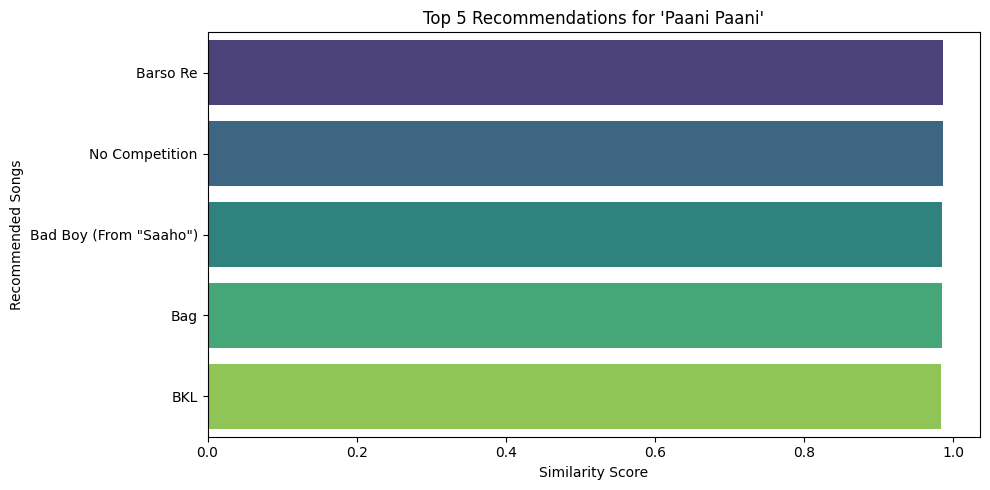

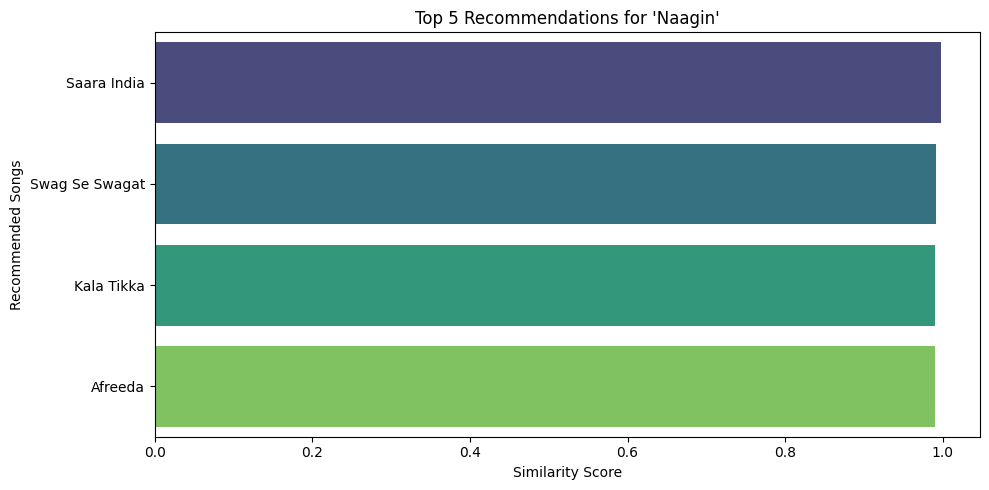

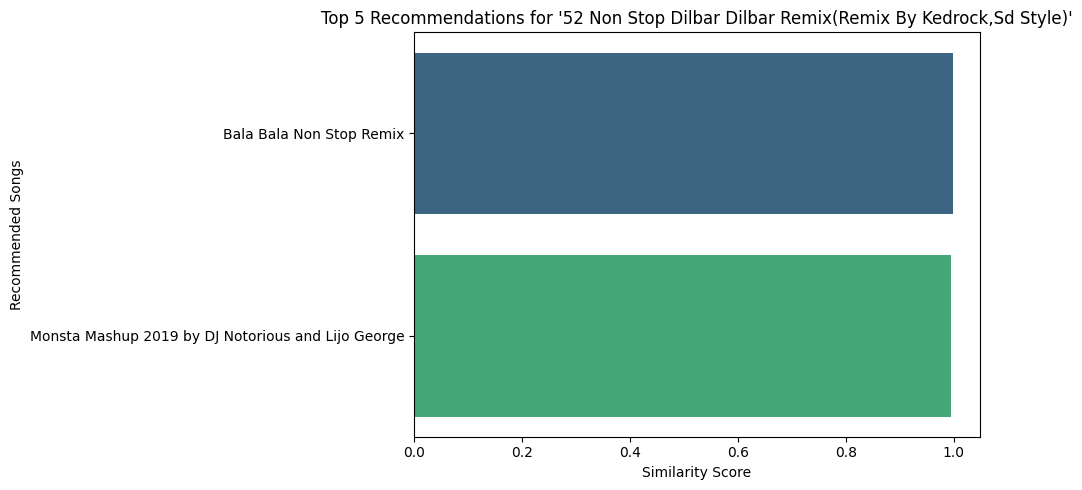

In [ ]:
# Example 1: Using "Paani Paani"
plot_similar_songs("Paani Paani", n=5)

# Example 2: Using "Naagin"
plot_similar_songs("Naagin", n=5)

# Example 3: Using "52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)"
plot_similar_songs("52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)", n=5)

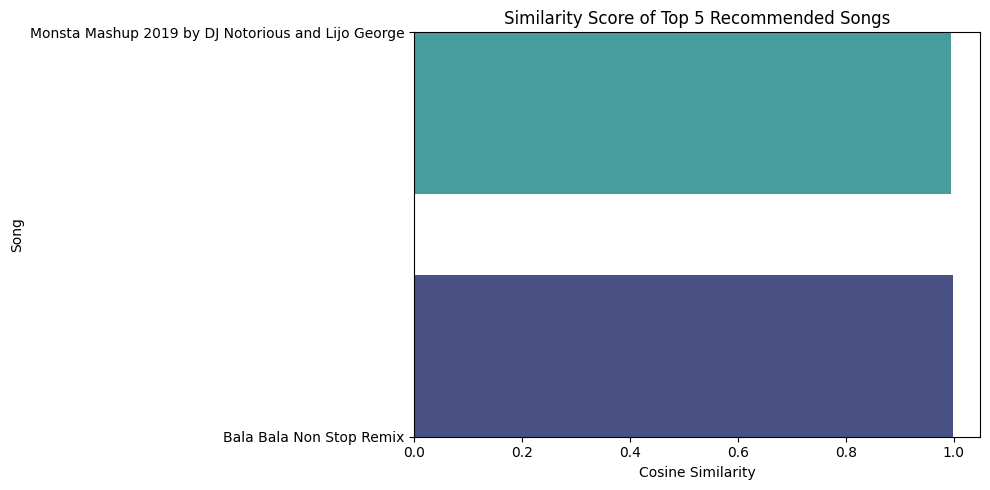

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_scores(song_name, artist_name=None, n=5):
    recs = recommend_songs(song_name, artist_name, n)
    if isinstance(recs, str):
        print(recs)
        return

    plt.figure(figsize=(10, 5))
    sns.barplot(x='similarity', y='track_name', data=recs, palette='mako')
    plt.title(f"Similarity Score of Top {n} Recommended Songs")
    plt.xlabel("Cosine Similarity")
    plt.ylabel("Song")
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

plot_similarity_scores("52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)", n=5)


In [ ]:
def get_mean_similarity(song_name, artist_name=None, n=5):
    recs = recommend_songs(song_name, artist_name, n)
    if isinstance(recs, str):
        return recs
    return round(recs['similarity'].mean() * 100, 2)  # percentage-like

accuracy = get_mean_similarity("52 Non Stop Dilbar Dilbar Remix(Remix By Kedrock,Sd Style)", n=5)
print(f"Average similarity (accuracy-like score): {accuracy}%")

Average similarity (accuracy-like score): 99.65%


The plot_similar_songs() function then plots these recommendations in a line graph.

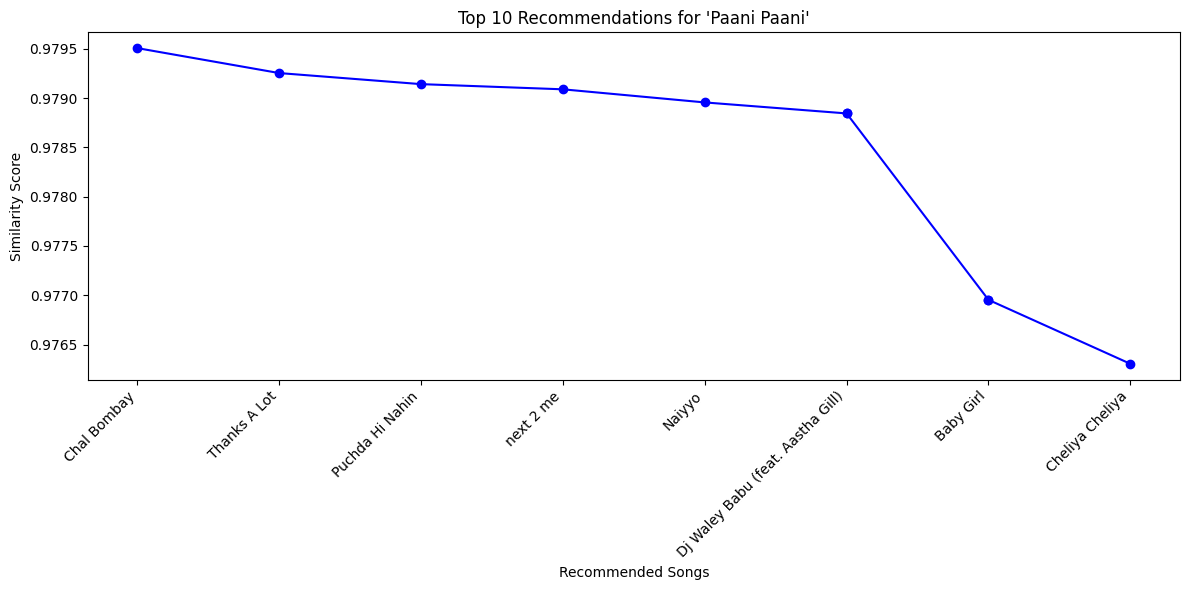

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Spotify Recommendation System/Perfect Data using/SingerAndSongs.csv")  # Replace with your actual CSV file
df.columns = df.columns.str.strip().str.lower()

# Rename for consistency
df.rename(columns={'song name': 'track_name', 'singer': 'artist_name'}, inplace=True)

# Drop duplicates and missing values
df.drop_duplicates(subset=['track_name', 'artist_name'], inplace=True)
df.dropna(inplace=True)

# Audio features to use
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

# Normalize the features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

# Recommendation function
def recommend_songs(song_name, artist_name=None, n=10, m=20):
    song_name = song_name.lower()
    if artist_name:
        artist_name = artist_name.lower()
        match = df_scaled[(df_scaled['track_name'].str.lower() == song_name) &
                          (df_scaled['artist_name'].str.lower() == artist_name)]
    else:
        match = df_scaled[df_scaled['track_name'].str.lower() == song_name]

    if match.empty:
        return None  # Return None if song not found

    similarity = cosine_similarity(match[features], df_scaled[features])
    df_scaled['similarity'] = similarity[0]

    recommendations = df_scaled[df_scaled['track_name'].str.lower() != song_name]
    recommendations = recommendations.sort_values(by='similarity', ascending=False).iloc[n:m]  # Top 10 to 20 recommendations

    return recommendations[['track_name', 'artist_name', 'similarity']]

# Plot function for Line Graph
def plot_similar_songs(base_song, artist_name=None, n=10, m=20):
    recs = recommend_songs(base_song, artist_name, n, m)
    if recs is None:
        print("❌ Song not found. Please check the title or artist.")
        return

    plt.figure(figsize=(12, 6))
    plt.plot(recs['track_name'], recs['similarity'], marker='o', linestyle='-', color='b')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Top {m - n} Recommendations for '{base_song}'")
    plt.xlabel("Recommended Songs")
    plt.ylabel("Similarity Score")
    plt.tight_layout()
    plt.show()

# Example usage
plot_similar_songs("Paani Paani", n=10, m=20)